Question 4a

In [11]:
import pandas as pd
wine_quality = pd.read_csv('winequality-red.csv', sep=';')


Question 4b

In [12]:
import sklearn.model_selection

# We need to split twice to get training, validation and test splits
train_val_df, test_df = sklearn.model_selection.train_test_split(wine_quality, test_size=0.33, random_state=1)
train_df, validation_df = sklearn.model_selection.train_test_split(train_val_df, test_size=0.5, random_state=1)

# I have arbitrarily decided to split the dataset roughly into 3rds. 
# This is likely not the optimal way to do it as we will see
# Nonetheless it serves as an example for why you would want to vary them


Question 4c

In [24]:
import numpy as np

def add_bias_column(data):
    # Appends a column of ones to the data matrix for the bias term.
    return np.concatenate([np.ones((data.shape[0], 1)), data], axis=1)

class LinearRegression:
    def __init__(self, include_bias=False):
        self.coefficients = None
        self.include_bias = include_bias

    def train(self, features, targets):
        if self.include_bias:
            features = add_bias_column(features)
        self.coefficients = np.linalg.inv(features.T @ features) @ features.T @ targets
        return self.coefficients

    def predict(self, test_features):
        if self.include_bias:
            test_features = add_bias_column(test_features)
        if self.coefficients is None:
            raise ValueError('You must train the model before making predictions.')
        return test_features @ self.coefficients

# Initialize and train the model
linear_model = LinearRegression(include_bias=True)

train_features = train_df.drop(columns='quality').values
train_targets = train_df['quality'].values

model_coefficients = linear_model.train(train_features, train_targets)
predicted_train_targets = linear_model.predict(train_features)

test_features = test_df.drop(columns='quality').values
test_targets = test_df['quality'].values

predicted_test_targets = linear_model.predict(test_features)


Question 4d

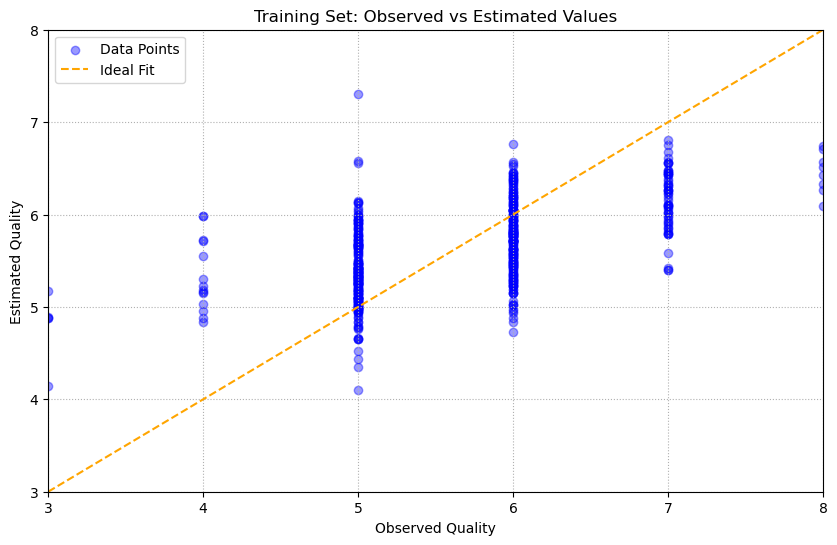

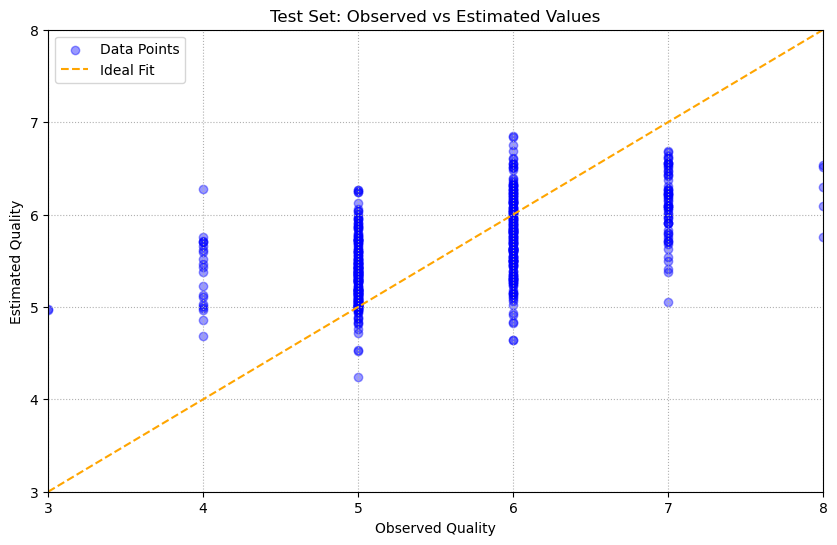

In [25]:
import matplotlib.pyplot as plt

def visualize_actual_vs_predicted(actual_values, predicted_values, plot_title):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual_values, predicted_values, color='blue', alpha=0.4, label='Data Points')
    plt.plot([actual_values.min(), actual_values.max()], 
             [actual_values.min(), actual_values.max()], 
             color='orange', linestyle='--', label='Ideal Fit')
    plt.title(plot_title)
    plt.xlabel('Observed Quality')
    plt.ylabel('Estimated Quality')
    plt.xlim(actual_values.min(), actual_values.max())
    plt.ylim(actual_values.min(), actual_values.max())
    plt.legend()
    plt.grid(visible=True, linestyle=':')
    plt.show()

visualize_actual_vs_predicted(train_targets, predicted_train_targets, 
                              "Training Set: Observed vs Estimated Values")
visualize_actual_vs_predicted(test_targets, predicted_test_targets, 
                              "Test Set: Observed vs Estimated Values")


Conclusions from looking at the plot:  

Error on the test set looks marginally bigger when looking at the tails, but smaller around 5 and 6  
Hard to observe other differences

Question 4e

In [26]:
def calculate_rmse(actual_values, predicted_values):
    # Calculate residuals
    residuals = actual_values - predicted_values
    # Compute and return the RMSE
    return np.sqrt((residuals @ residuals.T) / len(actual_values))

# Compute RMSE for training and test sets
train_rmse = calculate_rmse(train_targets, predicted_train_targets)
test_rmse = calculate_rmse(test_targets, predicted_test_targets)

# Display results
print(f"RMSE for the training set: {train_rmse}")
print(f"RMSE for the test set: {test_rmse}")


RMSE for the training set: 0.6485499246718687
RMSE for the test set: 0.6569585527179342


This corroborates the fact that the error is roughly equal across both sets

Question 4f

Iteration 0, RMSE: 5.6799
Iteration 100, RMSE: 2.8420
Iteration 200, RMSE: 2.4870
Iteration 300, RMSE: 2.1936
Iteration 400, RMSE: 1.9514
Iteration 500, RMSE: 1.7518
Iteration 600, RMSE: 1.5875
Iteration 700, RMSE: 1.4523
Iteration 800, RMSE: 1.3411
Iteration 900, RMSE: 1.2494


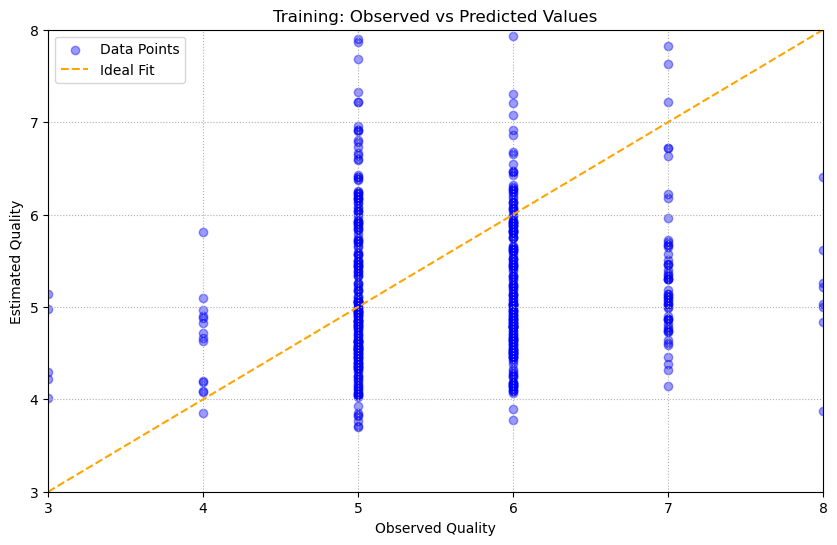

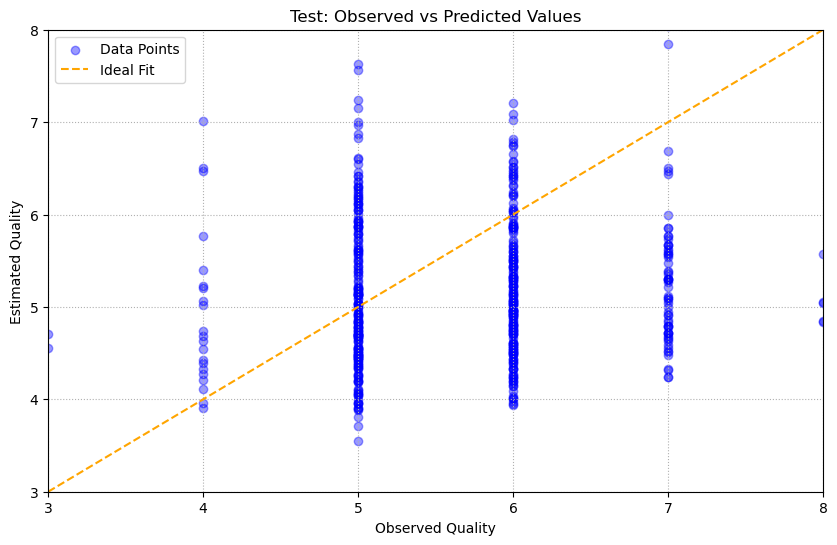

In [27]:
class GradientDescentLMS:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None
        self.intercept = None

    def train(self, features, targets):
        n_samples, n_features = features.shape

        # Initializing coefficients and intercept
        self.coefficients = np.zeros(n_features)
        self.intercept = 0

        for iteration in range(self.iterations):
            # Calculate predictions
            predictions = np.dot(features, self.coefficients) + self.intercept

            # Compute gradients
            gradient_coefficients = (1 / n_samples) * np.dot(features.T, (predictions - targets))
            gradient_intercept = (1 / n_samples) * np.sum(predictions - targets)

            # Update coefficients and intercept
            self.coefficients -= self.learning_rate * gradient_coefficients
            self.intercept -= self.learning_rate * gradient_intercept

            # Log RMSE every 100 iterations
            if iteration % 100 == 0:
                rmse = calculate_rmse(targets, predictions)
                print(f"Iteration {iteration}, RMSE: {rmse:.4f}")

    def predict(self, features):
        return np.dot(features, self.coefficients) + self.intercept


# Initialize and train the LMS model
gd_lms_model = GradientDescentLMS(learning_rate=0.00002, iterations=1000)
# Chosen parameters as larger learning rates didn't yield good results
gd_lms_model.train(train_features, train_targets)

# Predict outcomes
predicted_train_values = gd_lms_model.predict(train_features)
predicted_test_values = gd_lms_model.predict(test_features)

# Plot results
visualize_actual_vs_predicted(train_targets, predicted_train_values, 
                              "Training: Observed vs Predicted Values")
visualize_actual_vs_predicted(test_targets, predicted_test_values, 
                              "Test: Observed vs Predicted Values")


Question 4g

In [28]:
# Calculate RMSE for the training and test predictions
rmse_train_alt = calculate_rmse(train_targets, predicted_train_values)
rmse_test_alt = calculate_rmse(test_targets, predicted_test_values)

# Display the RMSE results
print(f"RMSE for the training set: {rmse_train_alt:.4f}")
print(f"RMSE for the test set: {rmse_test_alt:.4f}")


RMSE for the training set: 1.1739
RMSE for the test set: 1.1936
